## Colab Installations if Needed

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Master Thesis/DeepRL
!ls -l
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Master Thesis/DeepRL
total 1370
drwx------ 3 root root   4096 Nov 12 15:35  agents
-rw------- 1 root root 311320 Nov 12 20:20  DQN_Cartpole.ipynb
-rw------- 1 root root 600354 Nov 12 15:35  DQN_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov 12 15:35  DQN_trained_models
drwx------ 3 root root   4096 Nov 12 15:35  helpers
-rw------- 1 root root 289903 Nov 13 11:37  PG_Cartpole.ipynb
-rw------- 1 root root 168364 Nov 12 15:35  PG_Lunar_Lander.ipynb
drwx------ 4 root root   4096 Nov 13 11:19  PG_trained_models
drwx------ 2 root root   4096 Nov 12 15:35  Presentations
-rw------- 1 root root   5852 Nov 12 15:35  README.md
-rw------- 1 root root     88 Nov 12 15:35  requirements.txt
drwx------ 2 root root   4096 Nov 12 16:14 'Thesis Draft'
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.downl

# Imports 

In [2]:
from agents.PG_Agent import PG_Agent
from helpers.plot_util import *

Create PG_Agent

In [3]:
agent = PG_Agent(
                env_name="CartPole-v1",
                 ALPHA=0.0005,
                 GAMMA=0.99,
                 layer1_size=32, 
                 layer2_size=32,
                 #fname='trained_models/cartpole/reinforce_model_121',
                 reproduce_seed=None)

#agent.train_multiple_episodes(env,num_episodes=5000)
#num_episodes,rewards_per_ep,mean_rewards_per_ep = agent.get_stats()

# If you want to first train an agent use this cell ❎

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Ep: 2000 , Ep_Steps: 500 , Ep_Reward : 500.00 , Avg_Reward : 488.40 , Loss: -2.90
 Agent trained.....

 Saving Model info.....

 CartPole-v1 Problem took 2000 episodes


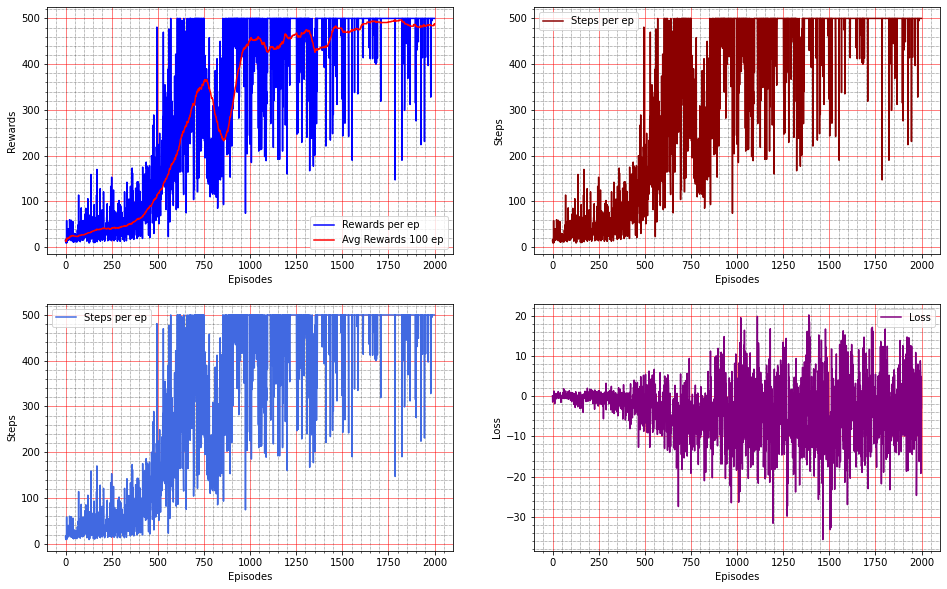

In [4]:
agent.train_multiple_episodes(num_episodes=2000)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
#learning_plot(book_keeping)
PG_learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 500.0 , Steps 500
Tests # 900 , Rewards 500.0 , Steps 500
Tests # 930 , Rewards 500.0 , Steps 500
Tests # 180 , Rewards 500.0 , Steps 500
Tests # 660 , Rewards 500.0 , Steps 500
Tests # 240 , Rewards 500.0 , Steps 500
Tests # 960 , Rewards 500.0 , Steps 500
Tests # 450 , Rewards 500.0 , Steps 500
Tests # 30 , Rewards 500.0 , Steps 500
Tests # 90 , Rewards 500.0 , Steps 500
Tests # 150 , Rewards 500.0 , Steps 500
Tests # 210 , Rewards 500.0 , Steps 500
Tests # 330 , Rewards 500.0 , Steps 500
Tests # 420 , Rewards 500.0 , Steps 500
Tests # 510 , Rewards 500.0 , Steps 500
Tests # 75 , Rewards 500.0 , Steps 500


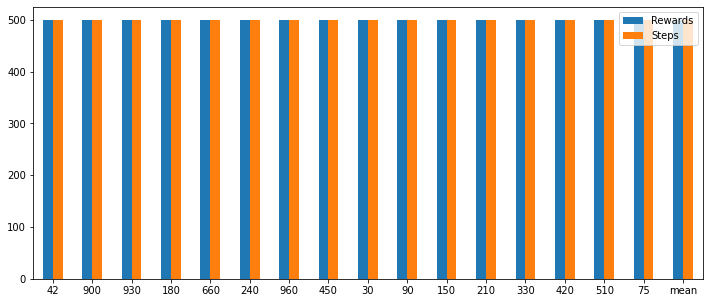

In [5]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

# If you want to use a pretrained model use this cell ❎

In [ ]:
if not agent.trained:
  # Good Models 
  # not so good models 
  model_suffix="20211108-082804" # some 
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)

### Render the 16 Test Case gif's : ⏩

In [6]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x82\x00\x00\x00\x00\x00\xcc\x99fff\xcc\x99\x99\xcc\…